
# Second-Order Differential Equations

The most common physics laws are described mathematically as second-order differential equations, meaning they have terms with the second-derivative of the dependent variable(s).  Examples include Newton's 2nd law, the Schrodinger equation, Laplace and Poisson equations, etc.

Here we concentrate on ordinary differential equations, not partial differential equations, where the derivatives are taken with respect to a single independent variable like time.

Note that since integrating such an equation creates two constants of integration, we need two initial conditions for each independent variable to completely solve our initial value problem.  

## Transformation to First-order Equations in 1-Dimension

Our previous discussion of solving first-order equations for multiple variables provides the fundamental insight needed to solve the second-order problem for a single (or multiple) variable(s).

The basic form of a second-order (highest degree of differentiation) equation for an independent variable, t, and a dependent variable, x, is -
$$f(\frac{d^2x(t)}{dt^2},\frac{dx(t)}{dt},x(t),t)=0$$
where I have explicitly noted the variable dependence and f is the overall function.Written in simpler notation  we have - 
$$f(x''(t),x'(t),x(t),t)=0$$

Our approach is to take the following steps -
1. define a new variable - y(t) - as $\frac{dx(t)}{dt}$
2. Substitute in y'(t) for x''(t) and y(t) for x'(t) in f giving a first order differential equation for y'(t)
3. Make a second first-order differential equation out of x'(t) = y(t)

This allows us to write the same differential equation as two first-order equations and use the multi-variable approach to propagate the solution forward. We then need the initial values of x(t) and y(t) to get the full solution.

As an example, consider the harmonic oscillator equation for a simple pendulum - 
$$\frac{d^2\theta(t)}{dt^2} + \frac{g}{L}sin(\theta(t))=0$$ 

Using our prescription from above, let us define -
$$\omega(t) = \frac{d\theta(t)}{dt}$$
$$\frac{d\omega(t)}{dt} = \frac{d^2\theta(t)}{dt^2}$$

With these definitions in place, our two differential equations are now - 
$$\frac{d\theta(t)}{dt} = \omega(t)$$
$$\frac{d\omega(t)}{dt} = -\frac{g}{L}sin(\theta(t))$$ 

Now we can use these to solve for $\omega(t)$ and $\theta(t)$ to our heart's content!

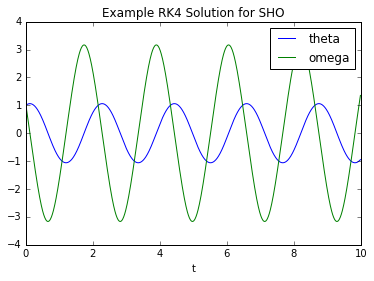

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(r,t,omegasqr):
    theta=r[0]
    omega=r[1]
    dtheta = omega
    domega=-omegasqr*np.sin(theta)
    return np.array([dtheta,domega],float)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition
g=9.8
L=1.0
omegasqr=g/L

#create the array of time values and (empty) x-values, and loop over 
#all times supplementing x each time
tpoints = np.arange(a,b,h)
omegapts = []
thetapts = []
r = np.array([1.0,1.0],float)   #initial conditions for omega,theta, r is current value vector

#all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    thetapts.append(r[0])
    omegapts.append(r[1])
    k1 = h*f(r,t,omegasqr)
    k2 = h*f(r+0.5*k1,t+0.5*h,omegasqr)
    k3 = h*f(r+0.5*k2,t+0.5*h,omegasqr)
    k4 = h*f(r+k3,t+h,omegasqr)
    r += (k1+2.*k2+2.*k3+k4)/6

plt.plot(tpoints,thetapts,label='theta')
plt.plot(tpoints,omegapts,label='omega')
plt.title("Example RK4 Solution for SHO")
plt.xlabel("t")
plt.legend(loc='upper right')
#plt.ylabel("x(t)")
plt.show()

$\mathbf{Exercise: }$ What are the two equations for the damped harmonic oscillator - 
$$\frac{d^2\theta(t)}{dt^2} + 2\beta\frac{d\theta(t)}{dt}+ {\omega_0}^2sin(\theta(t))=0$$ 

where $\beta$ is the damping constant and we have replaced g/L with the square of the natural frequence, $\omega_0$

$\mathbf{Exercises: }$ What are the equations for a 1D ball drop problem?

For a 2-d projectile problem?

For a 2-d projectile motion problem with air friction proportional to $v^2$?